# Particle swarm optimization para  optimización continua con restricciones – External feasibility first – sum version (PySwarms)

### Descripción
    
<font size="4"> Uso de la plataforma PySwarms para resolver problemas de optimización continua con restricciones. Los problemas se transforman para incluir las restricciones en el objetivo con el enfoque "primero factibilidad", externo, versión max. Se usa la topología fully connected (global best).

---

### Requerimientos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyswarms as ps
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

### Fijar semilla para reproducibilidad 

In [2]:
np.random.seed(1) # pyswarm usa la semilla de numpy

### Definición del problema de optimización con restricciones
- $L$: Límite inferior de espacio de búsqueda
- $U$: Límite superior de espacio de búsqueda
- $f$: Función objetivo
- $g$: Restricciones
- $maxf$:  Máximo (aproximado) de la función $f$

In [3]:
# Rosenbrock function constrained with a cubic and a line

def Rosenbrock_objective(x):
    f = (1-x[0])**2+100*(x[1]-x[0]**2)**2
    return f

def Rosenbrock_constraints(x):
    g = np.zeros(2)
    g[0] = (x[0]-1)**3-x[1]+1 # <=0
    g[1] = x[0]+x[1]-2 # <=0
    return g

def Rosenbrock():
    n = 2 # Número de variables de decisión    
    L = np.array([-1.5,-0.5])
    U = np.array([1.5,2.5])
    f = Rosenbrock_objective
    g = Rosenbrock_constraints
    maxf = 1e+4 # Máximo (aproximado) de la función f
    return L,U,f,g,maxf

# G3 problem
  
def G3_objective(x):
    f = (np.sqrt(x.size)**x.size)*np.prod(x)
    return -f

def G3_constraints(x):
    g = np.zeros(1)
    g[0] = np.abs(sum([i*i for i in x])-1)-1e-4
    return g

def G3():
    n = 10 # Número de variables de decisión
    L = np.full(n, 0.0)
    U = np.full(n, 1.0)
    f = G3_objective
    g = G3_constraints
    maxf = 1e+2 # Máximo (aproximado) de la función f 
    return L,U,f,g,maxf

# G1 problem

def G1_objective(x):
    f = 5*sum(x[0:4])-5*sum([x[i]*x[i] for i in range(4)])-sum(x[4:])
    return f

def G1_constraints(x):
    g = np.zeros(9)
    g[0] = 2*x[0]+2*x[1]+x[9]+x[10]-10
    g[1] = 2*x[0]+2*x[2]+x[9]+x[11]-10
    g[2] = 2*x[1]+2*x[2]+x[10]+x[11]-10    
    g[3] = -8*x[0]+x[9]
    g[4] = -8*x[1]+x[10]    
    g[5] = -8*x[2]+x[11]
    g[6] = -2*x[3]-x[4]+x[9]
    g[7] = -2*x[5]-x[6]+x[10]    
    g[8] = -2*x[7]-x[8]+x[11]
    return g 

def G1():
    n = 13 # Número de variables de decisión
    L = np.full(n, 0.0)
    U = np.full(n, 1.0)
    U[9] = 100
    U[10] = 100
    U[11] = 100
    f = G1_objective
    g = G1_constraints
    maxf = 1e+2 # Máximo (aproximado) de la función f
    return L,U,f,g,maxf

#L,U,f,g,maxf = Rosenbrock()
#L,U,f,g,maxf = G3()
#L,U,f,g,maxf = G1()

In [4]:
# Problema de optimización con 2 restricciones: S3D2

def S3D2_objective(x):
    f = 10*x[0]*np.cos(15*np.pi*x[0])
    return f

def S3D2_constraints(x):
    g = np.zeros(2)
    g[0] = 20*x[0]-10
    g[1] = -5*np.sin(12*x[0])
    return g

def S3D2():
    n = 1 # Número de variables de decisión    
    L = np.full(n, 0.0)
    U = np.full(n, 1.0)
    f = S3D2_objective
    g = S3D2_constraints
    maxf = 9.0 # Máximo (aproximado) de la función f
    return L,U,f,g,maxf

L,U,f,g,maxf = S3D2()

### Definición del problema transformado

In [5]:
def transformed_problem(x):
    sumg = np.sum(np.maximum(0, g(x)))
    if sumg <= 0.0:
        return f(x)
    else:
        return maxf+sumg

### Función objetivo

In [6]:
# NOTA IMPORTANTE: En PySwarm la función objetivo recibe una población de individuos y los evalúa todos
def objective_func(x):
    fitness = np.empty(x.shape[0])
    for i in range(x.shape[0]):
        fitness[i] = transformed_problem(x[i])
    return fitness

### Parámetros del algoritmo

- $n\_particles$: Número de partículas en el enjambre
- $dimensions$: Número de dimensiones en el espacio de búsqueda (número de variables de decisión)
- $bounds$: Límites del espacio de búsqueda
- $options$: Parámetros de la topología full connected
  - $c1$: Parámetro cognitivo
  - $c2$: Parámetro social
  - $w$: Parámetro de inercia

In [7]:
iters=1000
n_particles=100
bounds = (L,U)
dimensions = L.size
options = {'c1': 0.3, 'c2': 0.3, 'w':0.9}

### Construcción de una instancia del algoritmo  PSO

In [8]:
optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=dimensions, options=options, bounds=bounds)

### Optimización

In [9]:
%%time
cost, pos = optimizer.optimize(objective_func=objective_func, iters=iters)

2025-02-20 17:25:38,246 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.3, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.01
2025-02-20 17:25:48,947 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.0111443047102044, best pos: [0.20221876]


CPU times: total: 7.19 s
Wall time: 10.7 s


### Mostrar solución, valor de la función objetivo (del problema original), valor de las restricciones y factibilidad para la mejor solución encontrada

In [10]:
best_solution = pos
print("x: ",best_solution)
best_f = f(best_solution)
print("f: ",best_f)
best_g = g(best_solution)
print("g: ",best_g)
print("gmax: ",max(best_g))

x:  [0.20221876]
f:  -2.0111443047102044
g:  [-5.95562487 -3.27796466]
gmax:  -3.2779646558209197


### Visualizar evolución

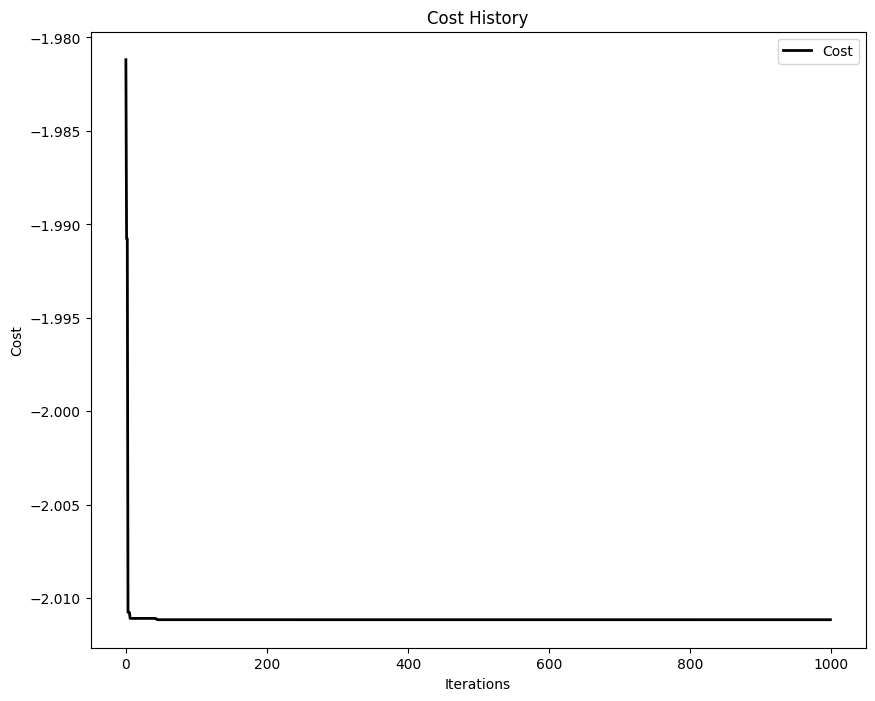

In [11]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

### Visualización de la solución obtenida por el algoritmo

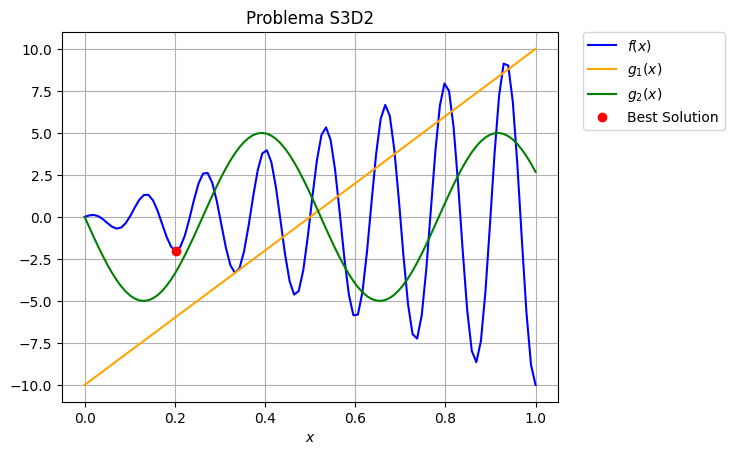

In [16]:
x = np.linspace(L[0], U[0], 100) # 1000 puntos entre L[0] y U[0]
f_values = np.array([f([xi]) for xi in x]) # 1000 puntos en f
g_values = np.array([g([xi]) for xi in x]) # 1000 puntos en g[0] y g[1]
plt.plot(x, f_values,color='blue',label='$f(x)$')
plt.plot(x, g_values[:, 0], color='orange',label='$g_1(x)$')
plt.plot(x, g_values[:, 1], color='green',label='$g_2(x)$')
plt.plot(best_solution, f(best_solution), 'ro',label='Best Solution') # imprime el óptimo
plt.grid(True)
plt.xlabel('$x$')
plt.title('Problema S3D2')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.savefig('EA-ProblemaS3D2-External-sum-Solution.png')
plt.show()

### Visualización de la solución obtenida por el algoritmo (función transformada)

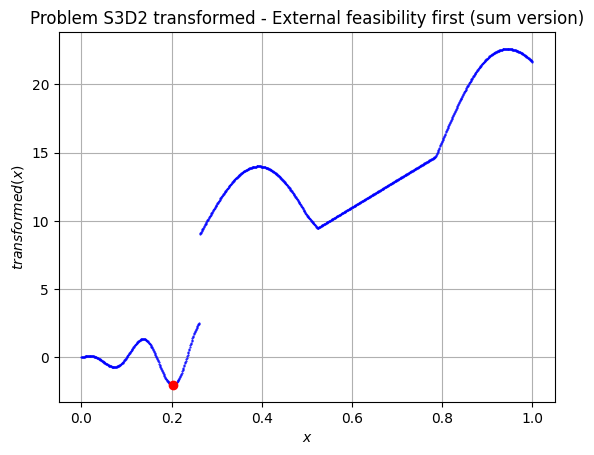

<Figure size 640x480 with 0 Axes>

In [14]:
x = np.linspace(L[0], U[0], 1000) # 1000 puntos entre L[0] y U[0]
f_values = np.array([transformed_problem([xi]) for xi in x]) # 1000 puntos en f
plt.plot(x, f_values,'.',color='blue',markersize=1)
plt.plot(best_solution, transformed_problem(best_solution), 'ro') # imprime el óptimo
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$transformed(x)$')
plt.title('Problem S3D2 transformed - External feasibility first (sum version)')
plt.show()
plt.savefig('EA-ProblemaS3D2-External-sum-Solution-transformed-sum.png')